# Imports

In [1]:
#from src import Build_mc,Upload_geof,Upload_geof_geografica,Upload_litologia,plot_filtered_values,plot_raw_mag_data,plot_raw_gama_data,plot_histograms,plot_interpolated_histograms,describe_geologico, plotBoxplots,remove_negative_values,sintetic_grid,traditional_interpolation,plot_interpolated_histograms,pop_nodata
from src import *
from pylab import *

from tqdm import tqdm
from shapely.ops import transform
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import verde as vd
import numpy as np
import os
import pyproj
import verde_source as vds

import seaborn as sns
import xarray as xr
import matplotlib

from sklearn_som.som import SOM
from sklearn.preprocessing import StandardScaler

/home/ggrl/.config/ambiente_geologico/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib widget
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [3]:
'''def sintetic_grider(quadricula=None,p_size=None):
    ids = list(quadricula.keys())
    wgs84=pyproj.CRS('EPSG:4326')
    for id in tqdm(ids):
        folha = quadricula[id]['folha']
        utm = pyproj.CRS('EPSG:'+folha['EPSG'])
        carta_geografica = folha['geometry']
        project = pyproj.Transformer.from_crs(wgs84,utm, always_xy=True).transform
        carta_utm = transform(project,carta_geografica)
        break
'''

"def sintetic_grider(quadricula=None,p_size=None):\n    ids = list(quadricula.keys())\n    wgs84=pyproj.CRS('EPSG:4326')\n    for id in tqdm(ids):\n        folha = quadricula[id]['folha']\n        utm = pyproj.CRS('EPSG:'+folha['EPSG'])\n        carta_geografica = folha['geometry']\n        project = pyproj.Transformer.from_crs(wgs84,utm, always_xy=True).transform\n        carta_utm = transform(project,carta_geografica)\n        break\n"

## Construindo Quadrícula

In [4]:
quadricula = Build_mc(escala='250k',ID=['S','N'],verbose=True)

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00, 401.04it/s]


 - Folhas selecionadas:


30it [00:00, 298.01it/s]

"SB18_ZA"
"SB18_ZC"
"SC18_XA"
"SB18_XB"
"SB18_XD"
"SB18_ZB"
"SB18_ZD"
"SC18_XB"
"SC18_XD"
"SC18_ZB"
"SB19_VA"
"SB19_VC"
"SB19_YA"
"SB19_YC"
"SC19_VA"
"SC19_VC"
"SC19_YA"
"SC19_YC"
"SA19_VB"
"SA19_VD"
"SA19_YB"
"SA19_YD"
"SB19_VB"
"SB19_VD"
"SB19_YB"
"SB19_YD"
"SC19_VB"
"SC19_VD"
"SC19_YB"
"SC19_YD"
"SA19_XA"
"SA19_XC"
"SA19_ZA"
"SA19_ZC"
"SB19_XA"
"SB19_XC"
"SB19_ZA"
"SB19_ZC"
"SC19_XA"
"SC19_XC"
"SC19_ZA"
"SC19_ZC"
"SA19_XB"
"SA19_XD"
"SA19_ZB"
"SA19_ZD"
"SB19_XB"
"SB19_XD"
"SB19_ZB"
"SB19_ZD"
"SC19_XB"
"SC19_XD"
"SC19_ZB"
"SA20_VA"
"SA20_VC"
"SA20_YA"
"SA20_YC"
"SB20_VA"
"SB20_VC"
"SB20_YA"
"SB20_YC"
"SC20_VA"
"SC20_VC"
"SC20_YA"


66it [00:00, 328.74it/s]

"SC20_YC"
"SD20_VA"
"SA20_VB"
"SA20_VD"
"SA20_YB"
"SA20_YD"
"SB20_VB"


102it [00:00, 342.24it/s]

"SB20_VD"
"SB20_YB"
"SB20_YD"
"SC20_VB"
"SC20_VD"
"SC20_YB"
"SC20_YD"
"SD20_VB"
"SA20_XA"
"SA20_XC"
"SA20_ZA"
"SA20_ZC"
"SB20_XA"
"SB20_XC"
"SB20_ZA"
"SB20_ZC"
"SC20_XA"
"SC20_XC"
"SC20_ZA"
"SC20_ZC"
"SD20_XA"
"SD20_XC"
"SA20_XB"
"SA20_XD"
"SA20_ZB"
"SA20_ZD"
"SB20_XB"
"SB20_XD"
"SB20_ZB"
"SB20_ZD"
"SC20_XB"
"SC20_XD"
"SC20_ZB"
"SC20_ZD"
"SD20_XB"
"SD20_XD"
"SD20_ZB"
"SD20_ZD"
"SE20_XB"
"SA21_VA"
"SA21_VC"
"SA21_YA"
"SA21_YC"
"SB21_VA"
"SB21_VC"
"SB21_YA"
"SB21_YC"
"SC21_VA"
"SC21_VC"
"SC21_YA"
"SC21_YC"
"SD21_VA"
"SD21_VC"
"SD21_YA"
"SD21_YC"
"SE21_VA"
"SA21_VB"
"SA21_VD"
"SA21_YB"
"SA21_YD"
"SB21_VB"
"SB21_VD"
"SB21_YB"
"SB21_YD"
"SC21_VB"


137it [00:00, 340.88it/s]

"SC21_VD"
"SC21_YB"
"SC21_YD"
"SD21_VB"
"SD21_VD"
"SD21_YB"
"SD21_YD"


172it [00:00, 336.76it/s]

"SE21_VB"
"SE21_VD"
"SE21_YB"
"SE21_YD"
"SF21_VB"
"SF21_VD"
"SF21_YB"
"SH21_VD"
"SH21_YB"
"SA21_XA"
"SA21_XC"
"SA21_ZA"
"SA21_ZC"
"SB21_XA"
"SB21_XC"
"SB21_ZA"
"SB21_ZC"
"SC21_XA"
"SC21_XC"
"SC21_ZA"
"SC21_ZC"
"SD21_XA"
"SD21_XC"
"SD21_ZA"
"SD21_ZC"
"SE21_XA"
"SE21_XC"
"SE21_ZA"
"SE21_ZC"
"SF21_XA"
"SF21_XC"
"SF21_ZA"
"SF21_ZC"
"SH21_XA"
"SH21_XC"
"SH21_ZA"
"SH21_ZC"
"SA21_XB"
"SA21_XD"
"SA21_ZB"
"SA21_ZD"
"SB21_XB"
"SB21_XD"
"SB21_ZB"
"SB21_ZD"
"SC21_XB"
"SC21_XD"
"SC21_ZB"
"SC21_ZD"
"SD21_XB"
"SD21_XD"
"SD21_ZB"
"SD21_ZD"
"SE21_XB"
"SE21_XD"
"SE21_ZB"
"SE21_ZD"
"SF21_XB"
"SF21_XD"
"SF21_ZB"
"SF21_ZD"


207it [00:00, 339.61it/s]

"SG21_XB"
"SG21_XD"
"SG21_ZD"
"SH21_XB"
"SH21_XD"
"SH21_ZB"
"SH21_ZD"
"SA22_VA"


241it [00:00, 334.46it/s]

"SA22_VC"
"SA22_YA"
"SA22_YC"
"SB22_VA"
"SB22_VC"
"SB22_YA"
"SB22_YC"
"SC22_VA"
"SC22_VC"
"SC22_YA"
"SC22_YC"
"SD22_VA"
"SD22_VC"
"SD22_YA"
"SD22_YC"
"SE22_VA"
"SE22_VC"
"SE22_YA"
"SE22_YC"
"SF22_VA"
"SF22_VC"
"SF22_YA"
"SF22_YC"
"SG22_VA"
"SG22_VC"
"SG22_YA"
"SG22_YC"
"SH22_VA"
"SH22_VC"
"SH22_YA"
"SH22_YC"
"SI22_VA"
"SI22_VC"
"SA22_VB"
"SA22_VD"
"SA22_YB"
"SA22_YD"
"SB22_VB"
"SB22_VD"
"SB22_YB"
"SB22_YD"
"SC22_VB"
"SC22_VD"
"SC22_YB"
"SC22_YD"
"SD22_VB"
"SD22_VD"
"SD22_YB"
"SD22_YD"
"SE22_VB"
"SE22_VD"
"SE22_YB"
"SE22_YD"
"SF22_VB"
"SF22_VD"
"SF22_YB"
"SF22_YD"
"SG22_VB"
"SG22_VD"
"SG22_YB"


275it [00:00, 336.00it/s]

"SG22_YD"
"SH22_VB"
"SH22_VD"
"SH22_YB"
"SH22_YD"
"SI22_VB"
"SA22_XA"


345it [00:01, 343.22it/s]

"SA22_XC"
"SA22_ZA"
"SA22_ZC"
"SB22_XA"
"SB22_XC"
"SB22_ZA"
"SB22_ZC"
"SC22_XA"
"SC22_XC"
"SC22_ZA"
"SC22_ZC"
"SD22_XA"
"SD22_XC"
"SD22_ZA"
"SD22_ZC"
"SE22_XA"
"SE22_XC"
"SE22_ZA"
"SE22_ZC"
"SF22_XA"
"SF22_XC"
"SF22_ZA"
"SF22_ZC"
"SG22_XA"
"SG22_XC"
"SG22_ZA"
"SG22_ZC"
"SH22_XA"
"SH22_XC"
"SH22_ZA"
"SH22_ZC"
"SA22_XB"
"SA22_XD"
"SA22_ZB"
"SA22_ZD"
"SB22_XB"
"SB22_XD"
"SB22_ZB"
"SB22_ZD"
"SC22_XB"
"SC22_XD"
"SC22_ZB"
"SC22_ZD"
"SD22_XB"
"SD22_XD"
"SD22_ZB"
"SD22_ZD"
"SE22_XB"
"SE22_XD"
"SE22_ZB"
"SE22_ZD"
"SF22_XB"
"SF22_XD"
"SF22_ZB"
"SF22_ZD"
"SG22_XB"
"SG22_XD"
"SG22_ZB"
"SG22_ZD"
"SH22_XB"
"SH22_XD"
"SA23_VA"
"SA23_VC"
"SA23_YA"
"SA23_YC"
"SB23_VA"
"SB23_VC"
"SB23_YA"
"SB23_YC"
"SC23_VA"
"SC23_VC"


418it [00:01, 351.61it/s]

"SC23_YA"
"SC23_YC"
"SD23_VA"
"SD23_VC"
"SD23_YA"
"SD23_YC"
"SE23_VA"
"SE23_VC"
"SE23_YA"
"SE23_YC"
"SF23_VA"
"SF23_VC"
"SF23_YA"
"SF23_YC"
"SG23_VA"
"SG23_VC"
"SA23_VB"
"SA23_VD"
"SA23_YB"
"SA23_YD"
"SB23_VB"
"SB23_VD"
"SB23_YB"
"SB23_YD"
"SC23_VB"
"SC23_VD"
"SC23_YB"
"SC23_YD"
"SD23_VB"
"SD23_VD"
"SD23_YB"
"SD23_YD"
"SE23_VB"
"SE23_VD"
"SE23_YB"
"SE23_YD"
"SF23_VB"
"SF23_VD"
"SF23_YB"
"SF23_YD"
"SG23_VB"
"SA23_XC"
"SA23_ZA"
"SA23_ZC"
"SB23_XA"
"SB23_XC"
"SB23_ZA"
"SB23_ZC"
"SC23_XA"
"SC23_XC"
"SC23_ZA"
"SC23_ZC"
"SD23_XA"
"SD23_XC"
"SD23_ZA"
"SD23_ZC"
"SE23_XA"
"SE23_XC"
"SE23_ZA"
"SE23_ZC"
"SF23_XA"
"SF23_XC"
"SF23_ZA"
"SF23_ZC"
"SA23_ZB"
"SA23_ZD"
"SB23_XB"
"SB23_XD"
"SB23_ZB"
"SB23_ZD"
"SC23_XB"
"SC23_XD"
"SC23_ZB"


454it [00:01, 346.68it/s]

"SC23_ZD"
"SD23_XB"
"SD23_XD"
"SD23_ZB"
"SD23_ZD"
"SE23_XB"
"SE23_XD"
"SE23_ZB"
"SE23_ZD"
"SF23_XB"
"SF23_XD"
"SF23_ZB"
"SF23_ZD"
"SA24_YA"
"SA24_YC"
"SB24_VA"
"SB24_VC"
"SB24_YA"
"SB24_YC"
"SC24_VA"
"SC24_VC"
"SC24_YA"
"SC24_YC"
"SD24_VA"
"SD24_VC"
"SD24_YA"
"SD24_YC"
"SE24_VA"
"SE24_VC"
"SE24_YA"
"SE24_YC"
"SF24_VA"
"SF24_VC"
"SF24_YA"
"SA24_YB"
"SA24_YD"
"SB24_VB"
"SB24_VD"
"SB24_YB"
"SB24_YD"
"SC24_VB"
"SC24_VD"
"SC24_YB"
"SC24_YD"
"SD24_VB"
"SD24_VD"
"SD24_YB"
"SD24_YD"
"SE24_VB"
"SE24_VD"
"SE24_YB"
"SE24_YD"
"SF24_VB"
"SA24_ZC"
"SB24_XA"
"SB24_XC"
"SB24_ZA"
"SB24_ZC"
"SC24_XA"
"SC24_XC"
"SC24_ZA"
"SC24_ZC"
"SD24_XA"
"SD24_XC"
"SD24_ZA"


489it [00:01, 342.63it/s]

"SD24_ZC"
"SE24_XA"
"SB24_XB"


524it [00:01, 340.80it/s]

"SB24_XD"
"SB24_ZB"
"SB24_ZD"
"SC24_XB"
"SC24_XD"
"SC24_ZB"
"SC24_ZD"
"SB25_VC"
"SB25_YA"
"SB25_YC"
"SC25_VA"
"SC25_VC"
"SC25_YA"
"SA25_ZC"
"NA19_VD"
"NA19_VB"
"NA19_ZA"
"NA19_XC"
"NA19_XA"
"NA19_ZB"
"NA19_XD"
"NA19_XB"
"NB20_VA"
"NA20_YC"
"NA20_VC"
"NA20_VA"
"NB20_VB"
"NA20_YD"
"NA20_YB"
"NA20_VD"
"NA20_VB"
"NB20_XA"
"NA20_ZC"
"NA20_ZA"
"NA20_XC"
"NA20_XA"
"NB20_XD"
"NB20_XB"
"NA20_ZD"
"NA20_ZB"
"NA20_XD"
"NA20_XB"
"NB21_VC"
"NB21_VA"
"NA21_YC"
"NA21_YA"
"NA21_VC"
"NA21_VA"
"NA21_YB"
"NA21_VD"
"NA21_VB"
"NA21_ZA"
"NA21_XC"
"NA21_XA"
"NA21_ZB"
"NA21_XD"
"NA21_XB"
"NA22_YA"
"NA22_VC"
"NA22_VA"
"NB22_VB"
"NA22_YD"
"NA22_YB"
"NA22_VD"
"NA22_VB"
"NA22_ZA"
"NA22_XC"


560it [00:01, 340.72it/s]

"NA22_XA"
"NA22_XB"

  560 folhas adicionadas.


In [5]:
list_ids = list(quadricula.keys())
#print(list_ids)

'''
for id in list_ids:
    print(f' - Folha: {id}')
    carta=quadricula[id]
    data_list = list(carta.keys())
    print(data_list)
    for data in data_list[4:]:
        print(f'    - {data}')
        print(f'        - {list(quadricula[id][data].columns)}')
'''    
def print_quadriculas(quadricula=quadricula):
    list_ids = list(quadricula.keys())
    for id in list_ids:
        print(f' - Folha {id}')
        carta = quadricula[id]
        list_carta_keys = list(carta.keys())
        print(f'    - {list_carta_keys}:')
        for key in list_carta_keys:
            print(carta[key])
            print('')

In [6]:
print_quadriculas(quadricula)

 - Folha SB18_ZA
    - ['folha']:
EPSG                                                         32718
SIGLA                                                         None
geometry         POLYGON ((-75 -6, -73.5 -6, -73.5 -7, -75 -7, ...
geometry_proj    POLYGON ((500000 9336795.432607338, 666022.828...
Name: SB18_ZA, dtype: object

 - Folha SB18_ZC
    - ['folha']:
EPSG                                                         32718
SIGLA                                                         None
geometry         POLYGON ((-75 -7, -73.5 -7, -73.5 -8, -75 -8, ...
geometry_proj    POLYGON ((500000 9226251.134229975, 665695.031...
Name: SB18_ZC, dtype: object

 - Folha SC18_XA
    - ['folha']:
EPSG                                                         32718
SIGLA                                                         None
geometry         POLYGON ((-75 -8, -73.5 -8, -73.5 -9, -75 -9, ...
geometry_proj    POLYGON ((500000 9115702.14880412, 665317.0572...
Name: SC18_XA, dtype: object

 - F

### Construindo grid regular sintético

_Verde gridder_

In [7]:
from verde import grid_coordinates

In [8]:
def batch_grid_coordinates(quadricula,spacing=0.001,pixel_register=True):
    list_id = list(quadricula.keys())
    
    #print(f' Folhas disponíveis: {list_id}')
    for id in list_id:
        folha = quadricula[id]
        print(f' Folha  {id}')

        df = quadricula[id]['folha']
        area = (df['geometry'].bounds[0],df['geometry'].bounds[2],
                df['geometry'].bounds[1],df['geometry'].bounds[3])
        
        xu,yu = grid_coordinates(region=area,spacing=spacing,pixel_register=pixel_register)
       
        df['coords'] = xu,yu
        df['area'] = area
        x={'area':df}
        quadricula[id].update(x)
        

batch_grid_coordinates(quadricula)

 Folha  SB18_ZA
 Folha  SB18_ZC
 Folha  SC18_XA
 Folha  SB18_XB
 Folha  SB18_XD
 Folha  SB18_ZB
 Folha  SB18_ZD
 Folha  SC18_XB
 Folha  SC18_XD
 Folha  SC18_ZB
 Folha  SB19_VA
 Folha  SB19_VC
 Folha  SB19_YA
 Folha  SB19_YC
 Folha  SC19_VA
 Folha  SC19_VC
 Folha  SC19_YA
 Folha  SC19_YC
 Folha  SA19_VB
 Folha  SA19_VD
 Folha  SA19_YB
 Folha  SA19_YD
 Folha  SB19_VB
 Folha  SB19_VD
 Folha  SB19_YB
 Folha  SB19_YD
 Folha  SC19_VB
 Folha  SC19_VD
 Folha  SC19_YB
 Folha  SC19_YD
 Folha  SA19_XA
 Folha  SA19_XC
 Folha  SA19_ZA
 Folha  SA19_ZC
 Folha  SB19_XA
 Folha  SB19_XC
 Folha  SB19_ZA
 Folha  SB19_ZC
 Folha  SC19_XA
 Folha  SC19_XC
 Folha  SC19_ZA
 Folha  SC19_ZC
 Folha  SA19_XB
 Folha  SA19_XD
 Folha  SA19_ZB
 Folha  SA19_ZD
 Folha  SB19_XB
 Folha  SB19_XD
 Folha  SB19_ZB
 Folha  SB19_ZD
 Folha  SC19_XB
 Folha  SC19_XD
 Folha  SC19_ZB
 Folha  SA20_VA
 Folha  SA20_VC
 Folha  SA20_YA
 Folha  SA20_YC
 Folha  SB20_VA
 Folha  SB20_VC
 Folha  SB20_YA
 Folha  SB20_YC
 Folha  SC20_VA
 Folha  

In [ ]:
print_quadriculas(quadricula)

 - Folha SB18_ZA
    - ['folha', 'area']:
EPSG                                                         32718
SIGLA                                                         None
geometry         POLYGON ((-75 -6, -73.5 -6, -73.5 -7, -75 -7, ...
geometry_proj    POLYGON ((500000 9336795.432607338, 666022.828...
coords           ([[-74.9995, -74.99849999999999, -74.9975, -74...
area                                    (-75.0, -73.5, -7.0, -6.0)
Name: SB18_ZA, dtype: object

EPSG                                                         32718
SIGLA                                                         None
geometry         POLYGON ((-75 -6, -73.5 -6, -73.5 -7, -75 -7, ...
geometry_proj    POLYGON ((500000 9336795.432607338, 666022.828...
coords           ([[-74.9995, -74.99849999999999, -74.9975, -74...
area                                    (-75.0, -73.5, -7.0, -6.0)
Name: SB18_ZA, dtype: object

 - Folha SB18_ZC
    - ['folha', 'area']:
EPSG                                                

In [ ]:
quadricula['SF23_YA']['area']['coords']

In [ ]:
quadricula['SF23_YA']['folha']['coords']

## Adicionando dados brutos à Quadrícula

In [33]:
#Upload_geof(quadricula,'gama_line_1105','mag_line_1105',1000)
#gama_1039,mag_1039=Upload_geof(quadricula,'gama_1039','mag_1039',1000)

Upload_geof_geografica(quadricula,'gama_line_1105','mag_line_1105',0.01)

 65%|███████████████████████████▍              | 365/560 [00:16<00:09, 21.53it/s]

 - gama_line_1105 atualizado na folha: SF23_VC com 58640 pontos
 - mag_line_1105 atualizado na folha: SF23_VC com 590361 pontos
 - gama_line_1105 atualizado na folha: SF23_YA com 42009 pontos
 - mag_line_1105 atualizado na folha: SF23_YA com 436906 pontos


 69%|█████████████████████████████▏            | 389/560 [00:17<00:09, 18.21it/s]

 - mag_line_1105 atualizado na folha: SF23_VD com 84337 pontos
 - gama_line_1105 atualizado na folha: SF23_YB com 448632 pontos
 - mag_line_1105 atualizado na folha: SF23_YB com 4576712 pontos
 - gama_line_1105 atualizado na folha: SF23_YD com 280318 pontos


 70%|█████████████████████████████▍            | 393/560 [00:17<00:09, 17.39it/s]

 - mag_line_1105 atualizado na folha: SF23_YD com 2697866 pontos
 - mag_line_1105 atualizado na folha: SG23_VB com 13027 pontos


 74%|███████████████████████████████           | 414/560 [00:18<00:08, 18.24it/s]

 - mag_line_1105 atualizado na folha: SF23_XC com 57312 pontos
 - gama_line_1105 atualizado na folha: SF23_ZA com 254765 pontos
 - mag_line_1105 atualizado na folha: SF23_ZA com 2514178 pontos
 - gama_line_1105 atualizado na folha: SF23_ZC com 119632 pontos
 - mag_line_1105 atualizado na folha: SF23_ZC com 1123379 pontos


100%|██████████████████████████████████████████| 560/560 [00:25<00:00, 21.61it/s]


In [34]:
Upload_geof_geografica(quadricula,'gama_line_1089','mag_line_1089')

 68%|████████████████████████████▍             | 379/560 [00:09<00:04, 38.89it/s]

 - gama_line_1089 atualizado na folha: SC23_YB com 61129 pontos
 - mag_line_1089 atualizado na folha: SC23_YB com 610814 pontos
 - gama_line_1089 atualizado na folha: SC23_YD com 21007 pontos
 - mag_line_1089 atualizado na folha: SC23_YD com 209797 pontos


 72%|██████████████████████████████            | 401/560 [00:10<00:05, 29.95it/s]

 - gama_line_1089 atualizado na folha: SC23_XC com 82947 pontos
 - mag_line_1089 atualizado na folha: SC23_XC com 827833 pontos
 - gama_line_1089 atualizado na folha: SC23_ZA com 439570 pontos
 - mag_line_1089 atualizado na folha: SC23_ZA com 4395100 pontos
 - gama_line_1089 atualizado na folha: SC23_ZC com 25923 pontos
 - mag_line_1089 atualizado na folha: SC23_ZC com 257259 pontos


 77%|████████████████████████████████▏         | 429/560 [00:10<00:03, 38.88it/s]

 - mag_line_1089 atualizado na folha: SC23_XD com 11180 pontos
 - mag_line_1089 atualizado na folha: SC23_ZB com 34209 pontos


100%|██████████████████████████████████████████| 560/560 [00:14<00:00, 39.73it/s]


In [ ]:
quadricula['SF23_YA']['gama_line_1105'].head()

In [35]:
geof_list_ids = list(quadricula.keys())
for id in geof_list_ids:
    print(f' - Folha: {id}')
    carta=quadricula[id]
    data_list = list(carta.keys())
    print(data_list)
    for data in data_list[4:]:
        print(f'    - {data}')
        print(f'        - {list(quadricula[id][data].columns)}')
    print('')


 - Folha: SB18_ZA
['folha', 'area']

 - Folha: SB18_ZC
['folha', 'area']

 - Folha: SC18_XA
['folha', 'area']

 - Folha: SB18_XB
['folha', 'area']

 - Folha: SB18_XD
['folha', 'area']

 - Folha: SB18_ZB
['folha', 'area']

 - Folha: SB18_ZD
['folha', 'area']

 - Folha: SC18_XB
['folha', 'area']

 - Folha: SC18_XD
['folha', 'area']

 - Folha: SC18_ZB
['folha', 'area']

 - Folha: SB19_VA
['folha', 'area']

 - Folha: SB19_VC
['folha', 'area']

 - Folha: SB19_YA
['folha', 'area']

 - Folha: SB19_YC
['folha', 'area']

 - Folha: SC19_VA
['folha', 'area']

 - Folha: SC19_VC
['folha', 'area']

 - Folha: SC19_YA
['folha', 'area']

 - Folha: SC19_YC
['folha', 'area']

 - Folha: SA19_VB
['folha', 'area']

 - Folha: SA19_VD
['folha', 'area']

 - Folha: SA19_YB
['folha', 'area']

 - Folha: SA19_YD
['folha', 'area']

 - Folha: SB19_VB
['folha', 'area']

 - Folha: SB19_VD
['folha', 'area']

 - Folha: SB19_YB
['folha', 'area']

 - Folha: SB19_YD
['folha', 'area']

 - Folha: SC19_VB
['folha', 'area']

 

In [38]:
quadricula=pop_nodata(quadricula)
len(quadricula.keys())

16

In [36]:
for id in list(quadricula.keys()):
    print(f' - Folha:  {id}')
    carta = quadricula[id]
    print(f'    - {list(carta.keys())}')
    print('')

100%|██████████████████████████████████████| 560/560 [00:00<00:00, 126784.53it/s]

 - Folha:  SF23_VC
    - ['folha', 'area', 'gama_line_1105', 'mag_line_1105']

 - Folha:  SF23_YA
    - ['folha', 'area', 'gama_line_1105', 'mag_line_1105']

 - Folha:  SC23_YB
    - ['folha', 'area', 'gama_line_1089', 'mag_line_1089']

 - Folha:  SC23_YD
    - ['folha', 'area', 'gama_line_1089', 'mag_line_1089']

 - Folha:  SF23_VD
    - ['folha', 'area', 'mag_line_1105']

 - Folha:  SF23_YB
    - ['folha', 'area', 'gama_line_1105', 'mag_line_1105']

 - Folha:  SF23_YD
    - ['folha', 'area', 'gama_line_1105', 'mag_line_1105']

 - Folha:  SG23_VB
    - ['folha', 'area', 'mag_line_1105']

 - Folha:  SC23_XC
    - ['folha', 'area', 'gama_line_1089', 'mag_line_1089']

 - Folha:  SC23_ZA
    - ['folha', 'area', 'gama_line_1089', 'mag_line_1089']

 - Folha:  SC23_ZC
    - ['folha', 'area', 'gama_line_1089', 'mag_line_1089']

 - Folha:  SF23_XC
    - ['folha', 'area', 'mag_line_1105']

 - Folha:  SF23_ZA
    - ['folha', 'area', 'gama_line_1105', 'mag_line_1105']

 - Folha:  SF23_ZC
    - ['

## Vizualisando Área de Cobertura

In [48]:
SC23_ZB = quadricula['SC23_ZB']
SC23_ZB.keys()

dict_keys(['folha', 'area', 'mag_line_1089'])

In [47]:
SC23_ZB['folha']

EPSG                                                         32723
SIGLA                                                         None
geometry         POLYGON ((-43.5 -10, -42 -10, -42 -11, -43.5 -...
geometry_proj    POLYGON ((664411.0306524448 8894213.730602572,...
coords           ([[-43.4995, -43.49850000000001, -43.4975, -43...
area                                  (-43.5, -42.0, -11.0, -10.0)
Name: SC23_ZB, dtype: object

In [49]:
SC23_ZB['area']

EPSG                                                         32723
SIGLA                                                         None
geometry         POLYGON ((-43.5 -10, -42 -10, -42 -11, -43.5 -...
geometry_proj    POLYGON ((664411.0306524448 8894213.730602572,...
coords           ([[-43.4995, -43.49850000000001, -43.4975, -43...
area                                  (-43.5, -42.0, -11.0, -10.0)
Name: SC23_ZB, dtype: object

In [50]:
SC23_ZB['mag_line_1089']

,X,Y,LATITUDE,LONGITUDE,MDT,MAGIGRF,ALTURA
6287930,664122.41,8783615.71,-10.999948,-43.497812,425.14,-22.741,95.11
6287931,664122.39,8783623.33,-10.999879,-43.497812,425.18,-22.669,95.79
6287932,664122.43,8783630.97,-10.999810,-43.497812,425.17,-22.599,95.34
6287933,664122.46,8783638.61,-10.999741,-43.497812,425.16,-22.529,95.44
6287934,664122.50,8783646.25,-10.999672,-43.497812,425.15,-22.462,95.53
...,...,...,...,...,...,...,...
6346550,665121.55,8783643.07,-10.999655,-43.488670,421.44,-16.751,92.61
6346551,665121.47,8783635.23,-10.999726,-43.488671,421.37,-16.772,92.51
6346552,665121.38,8783627.40,-10.999797,-43.488671,421.31,-16.794,92.53
6346553,665121.29,8783619.56,-10.999868,-43.488671,421.24,-16.817,92.35


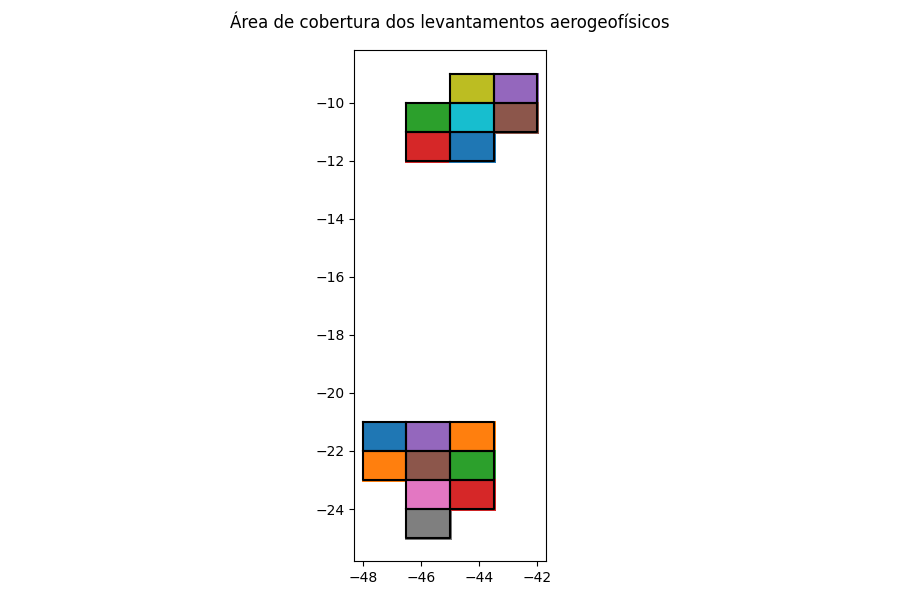

In [37]:
plt.figure(figsize=(9,6))
for id in list(quadricula.keys()):
    carta=quadricula[id]['area']
    plt.plot(*(carta['geometry']).exterior.xy,color='black')
    plt.axis('scaled')
    plt.scatter(carta['coords'][0],carta['coords'][1],s=1)    
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.axis('scaled')
plt.tight_layout()

In [ ]:
list(carta.keys())

In [ ]:
plt.figure(figsize=(14,9))
for id in list(quadricula.keys()):
    carta=quadricula[id]
    #print(carta.keys())
    plt.plot(*(carta['area']['geometry_proj']).exterior.xy,color='black')
    plt.axis('scaled')
    for data in list(carta.keys())[:]:
        if 'gama' in data:
            #print(data)
            plt.scatter(carta[data].X,carta[data].Y,c=carta[data].UTHRAZAO,cmap='hsv',s=1,marker='H')    
        else:
            None
plt.suptitle('Área de cobertura dos levantamentos aerogeofísicos')
plt.axis('scaled')
plt.tight_layout()

#### Visualizando dados Radiométricos Brutos

In [ ]:
df = quadricula['SF23_YA']['gama_line_1105']
#remove_negative_values()

In [ ]:
plot_histograms(df,500,'Levantamento 1105 Dados radiométricos brutos')

# Interpolação dos dados Brutos

## Verde Splines

## Método Linear

In [ ]:
list(quadricula['SF23_YA']['area'].keys())

In [ ]:
quadricula['SF23_YA']['area']['area']

In [ ]:
traditional_interpolation(quadricula,'mag_line_1105','gama_line_1105','linear','geof_1105',extrapolate=False,projec='geog')
#traditional_interpolation(quadricula,'mag_1039','gama_1039','linear','geof_1039',extrapolate=True)
#traditional_interpolation(quadricula,'mag_3022','gama_3022','linear','geof_3022')

In [ ]:
ds_a = quadricula['SF23_YA']['geof_1105_linear']
ds_b = quadricula['SF23_YB']['geof_1105_linear']
ds_c = quadricula['SF23_VC']['geof_1105_linear']
#ds_d = quadricula['SF23_VD']['geof_1105_linear']

In [ ]:
ds_c

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(12,9))
list_data = list(ds_c.keys())
for i,ax in enumerate(axes.flatten()):
    
    if i < len(list_data):
        if list_data[i] == 'GMT':
            ax.imshow(ds_a[list_data[i]],cmap='bwr')
            ax.set(title=ds_a[list_data[i]].name)
        elif list_data[i]=='MDT':
            ax.imshow(ds_a[list_data[i]],cmap='terrain')
            ax.set(title=ds_a[list_data[i]].name)
        
        else:
            ax.imshow(ds_a[list_data[i]])
            ax.set(title=ds_a[list_data[i]].name)

In [ ]:
fig, axes = plt.subplots(3,3,figsize=(14,12))
list_data = list(ds_a.keys())
for i,ax in enumerate(axes.flatten()):
    
    if i < len(list_data):
        if list_data[i] == 'GMT':
            ax.imshow(ds_a[list_data[i]],cmap='bwr')
            ax.set(title=ds_a[list_data[i]].name)
        elif list_data[i]=='MDT':
            ax.imshow(ds_a[list_data[i]],cmap='terrain')
            ax.set(title=ds_a[list_data[i]].name)
        
        else:
            ax.imshow(ds_a[list_data[i]])
            ax.set(title=ds_a[list_data[i]].name)

# Classificações Não-Supervisionadas

## Rotulando amostras com classes litológicas

In [ ]:
'''
import shapely.speedups
from shapely import geometry
shapely.speedups.enable()

#geof_1089_linear['geometry'] = [geometry.Point(x,y) for x, y in zip(geof_1089_linear['X'], geof_1089_linear['Y'])]
#gdf_1089_linear = geof_1089_linear.set_geometry('geometry')

#gdf_1089_linear.set_crs('EPSG:32723',inplace=True)
#gdf_1089_linear.geometry

#Upload_litologia(quadricula,'litologia_100k')

litologia=quadricula['SB24_ZB_II']['litologia_100k']
litologia.to_crs('EPSG:32724',inplace=True)
print(litologia.crs)
litologia.reset_index(drop=True,inplace=True)

dic_litologico = describe_geologico(litologia)
print(litologia.columns)

#print(dic_litologico['SIGLA']['len'])
#print(dic_litologico['SIGLA']['lista'])

#litologia.plot('SIGLA',figsize=(16,16),legend=True)

#geof_1089_linear['closest_unit'] = geof_1089_linear['geometry'].apply(lambda x: litologia['SIGLA'].iloc[litologia.distance(x).idxmin()]) # .idxmin() Retorna o indice do menor valor 

#geof_1089_linear.to_csv('/home/ggrl/database/csv/SB24_ZB_II_gama_linear_100m.csv',index=False)
'''

## Self-organizing maps (SOM)

### Pixel size

In [ ]:
help(pcolormesh)

In [ ]:
print(list(quadricula.keys()))
print('')
print(quadricula['SF23_YA'].keys())
print('')
ds_a = quadricula['SF23_YA']['geof_1105_linear']
ds_b = quadricula['SF23_YB']['geof_1105_linear']

In [ ]:
ds_b.LONGITUDE.values.max()

In [ ]:
ds_a.LONGITUDE.values.max()

In [ ]:
ds_b

In [ ]:
ds_b['LATITUDE']

In [ ]:
ds_a['LATITUDE']

In [ ]:
ds = xr.combine_by_coords([ds_a,ds_b])

In [ ]:
#for id in tqdm(list(quadricula.keys())):
#    ds = quadricula[id]['geof_1105_linear']
features = list(ds.keys())
print(features)

In [ ]:
df = ds[features].to_dataframe()
df = df.reset_index()
df

In [ ]:
xpixel_size = (ds.LONGITUDE.max().values-ds.LONGITUDE.min().values)/ds.LONGITUDE.size
ypixel_size = (ds.LATITUDE.max().values-ds.LATITUDE.min().values)/ds.LATITUDE.size
print('x:', xpixel_size, 'y:', ypixel_size)

In [ ]:
nx = ds.LATITUDE.size
ny = ds.LONGITUDE.size

print(ny,nx,ny/nx)

xs = df.LONGITUDE.values.reshape(nx,ny)
ys = df.LATITUDE.values.reshape(nx,ny)

In [ ]:
def plot_corr(dataframe, size=10):
    plt.figure(figsize = (size+size*0.2, size), facecolor='w')
    corrMatrix = dataframe.corr()
    sns.heatmap(np.round(corrMatrix,2), annot=True,vmin=-1,vmax=1,cmap='bwr',center=0)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0, ha='right')

plot_corr(df, size=12)
#plt.savefig('figs/correlation_matrix.png', dpi=400, bbox_inches='tight')

In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
data.shape

In [ ]:
n_clusters=4
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=50)
lito_SOM.fit(data)

In [ ]:
# predição de classes
predictions = lito_SOM.predict(data)

In [ ]:
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']

In [ ]:
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights,cmap='bwr',vmin=-1.5,vmax=1.5)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()

In [ ]:
id_ = [1,2,3,4]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)

In [ ]:
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)

In [ ]:
print(xs.shape,ys.shape)

In [ ]:
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data (SF23_YB_I)')
plt.axis('scaled')
plt.show()

In [ ]:
features = ['MDT','GMT','F_factor']

scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
n_clusters=10
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)
# predição de classes
predictions = lito_SOM.predict(data)
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']


# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()
import matplotlib
id_ = [1,2,3,4,5,6,7,8,9,10]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data ( Aguas de Lindóia - SF23_YA_III4)')
plt.axis('scaled')
plt.show()

In [ ]:
features = ['MDT','GMT','F_factor','CTCOR']

scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
n_clusters=10
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)
# predição de classes
predictions = lito_SOM.predict(data)
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']


# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()
import matplotlib
id_ = [1,2,3,4,5,6,7,8,9,10]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
plt.suptitle('SOM - Aerogeophysical Data ( Aguas de Lindóia - SF23_YA_III4)')
plt.axis('scaled')
plt.show()

In [ ]:
# get attributes
features = list(SF23_YA_III_4.keys())
print(features)
# transform a xarray.Dataset into pandas.Dataframe
df = SF23_YA_III_4[features].to_dataframe()
df = df.reset_index()

In [ ]:
# visualize correlations
plot_corr(df, size=12)
# SELECT FEATURES
features = ['MDT','GMT','F_factor']
print(f' - Selected Features: {features}')

In [ ]:
# get pixel size
xpixel_size = (ds.LONGITUDE.max().values-ds.LONGITUDE.min().values)/ds.LONGITUDE.size
ypixel_size = (ds.LATITUDE.max().values-ds.LATITUDE.min().values)/ds.LATITUDE.size
print('x:', xpixel_size, 'y:', ypixel_size)
# get number of pixels
nx = ds.LATITUDE.size
ny = ds.LONGITUDE.size
print(f'x:{ny} ; y:{nx} | x/y: {ny/nx}')
# reshape numpy.array into tuple of arrays
xs = df.LONGITUDE.values.reshape(nx,ny)
ys = df.LATITUDE.values.reshape(nx,ny)
# transform - fit dataframe to scallar matrix of shape 250 x 250
scaler = StandardScaler()
data = scaler.fit_transform(df[features].values)
print(f' - Scalar shape:   {data.shape}')
# Clusters, n, sigma, iterations
n_clusters=10
lito_SOM = SOM(m=n_clusters, n=1, sigma=1.5, dim=len(features), max_iter=10000)
lito_SOM.fit(data)
# predição de classes
predictions = lito_SOM.predict(data)
# create labels
cluster_labels=[]
for i in range(n_clusters):
    cluster_labels+=[f'Classe {i+1}']
# classes weights
fig, ax = plt.subplots(figsize=(19,19))
im=ax.matshow(lito_SOM.weights)
for (i, j), z in np.ndenumerate(lito_SOM.weights):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')
# 
plt.yticks(range(n_clusters), cluster_labels, fontsize=9)
plt.xticks(range(len(features)), features, rotation=55, fontsize=10, ha='left')
fig.colorbar(im, label='weights', orientation='horizontal')
plt.gca().set_aspect('equal')
plt.gcf().set_size_inches(10, 10)
plt.show()
import matplotlib
id_ = [1,2,3,4,5,6,7,8,9,10]
relcolor =  matplotlib.cm.Set3
colors = np.array(relcolor.colors)[id_]
relcolor = matplotlib.colors.ListedColormap(colors)
idxs=np.arange(0, n_clusters, 1)
half=(idxs[1]-idxs[0])/2
ticks=np.linspace(idxs[0]+half, idxs[-1]-half, n_clusters)
fig, ax=plt.subplots(figsize=(16, 16), facecolor='w')
im=plt.pcolormesh(xs, ys, predictions.reshape(ny, nx), cmap=relcolor, shading='auto')
plt.xlim(xs.min(), xs.max())
plt.ylim(ys.min(), ys.max())
cbar_ax = fig.add_axes([0.93, 0.3, 0.05, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, label = u'Classes', orientation='vertical',
                    ticks=ticks)
cbar.ax.set_yticklabels(cluster_labels, fontsize=8)
# 
plt.suptitle('SOM - Aerogeophysical Data ( Aguas de Lindóia - SF23_YA_III4)')
plt.axis('scaled')
plt.show()